In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [222]:
df = pd.read_csv("eurusd.csv", parse_dates=["Date"], index_col="Date")
df

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
...,...
2020-06-24,1.131235
2020-06-25,1.125087
2020-06-26,1.122208


In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4275 entries, 2004-01-01 to 2020-06-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   4275 non-null   float64
dtypes: float64(1)
memory usage: 66.8 KB


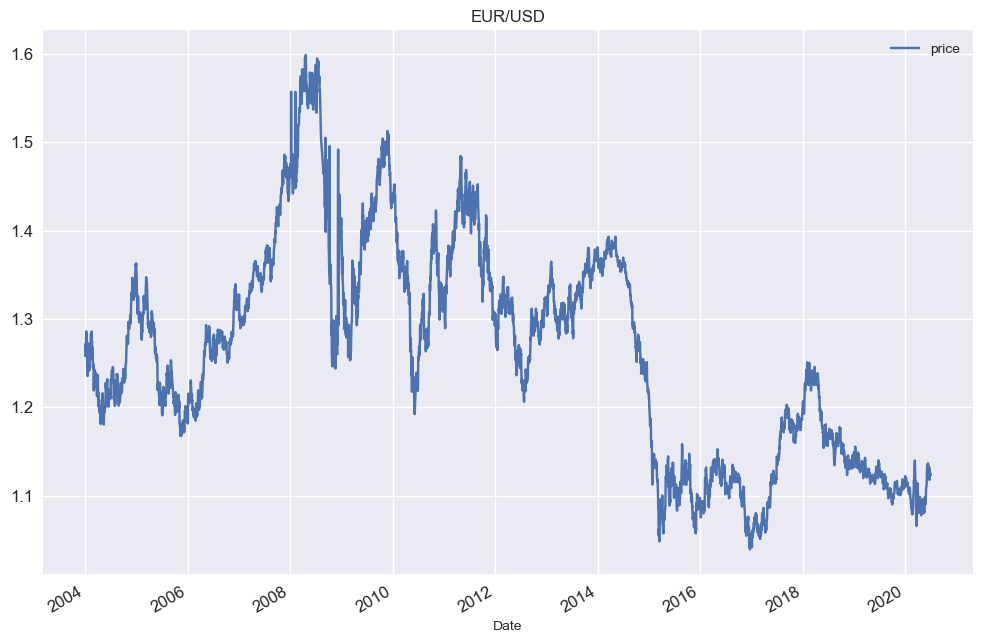

In [224]:
df.plot(figsize=(12, 8), title="EUR/USD", fontsize=12)
plt.show()

In [225]:
df["returns"] = np.log(df.div(df.shift(1)))
df

,price,returns
Date,,
2004-01-01,1.258194,NaN
2004-01-02,1.258194,0.000000
2004-01-05,1.268698,0.008313
2004-01-06,1.272103,0.002681
2004-01-07,1.264095,-0.006315
...,...,...
2020-06-24,1.131235,0.002892
2020-06-25,1.125087,-0.005449
2020-06-26,1.122208,-0.002562


In [226]:
df.dropna(inplace=True)

In [227]:
df

,price,returns
Date,,
2004-01-02,1.258194,0.000000
2004-01-05,1.268698,0.008313
2004-01-06,1.272103,0.002681
2004-01-07,1.264095,-0.006315
2004-01-08,1.277498,0.010547
...,...,...
2020-06-24,1.131235,0.002892
2020-06-25,1.125087,-0.005449
2020-06-26,1.122208,-0.002562


Text(0.5, 1.0, 'EUR/USD returns')

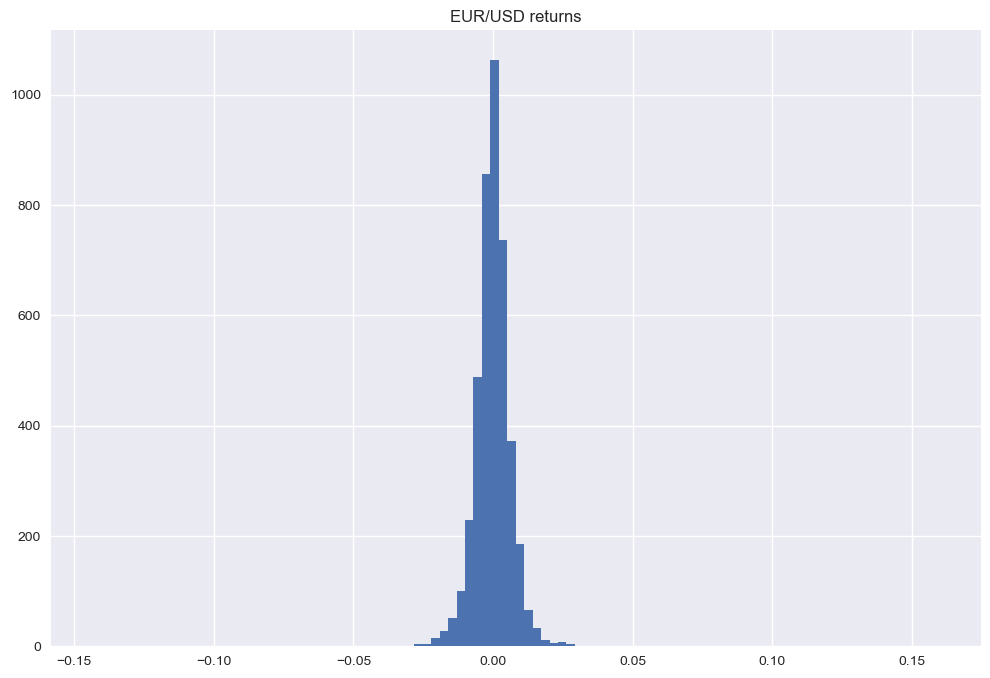

In [228]:
df.returns.hist(bins=100, figsize=(12, 8))
plt.title("EUR/USD returns")

In [229]:
df.returns.sum()

-0.11214302770699758

In [230]:
np.exp(df.returns.sum())

0.8939163935445148

In [231]:
df.price[-1] / df.price[0]

0.8939163935445141

In [232]:
df.returns.cumsum()

Date
2004-01-02    0.000000
2004-01-05    0.008313
2004-01-06    0.010994
2004-01-07    0.004679
2004-01-08    0.015226
                ...   
2020-06-24   -0.106368
2020-06-25   -0.111817
2020-06-26   -0.114379
2020-06-29   -0.114042
2020-06-30   -0.112143
Name: returns, Length: 4274, dtype: float64

In [233]:
df["creturns"] = df.returns.cumsum().apply(np.exp)

In [234]:
df

,price,returns,creturns
Date,,,
2004-01-02,1.258194,0.000000,1.000000
2004-01-05,1.268698,0.008313,1.008348
2004-01-06,1.272103,0.002681,1.011055
2004-01-07,1.264095,-0.006315,1.004690
2004-01-08,1.277498,0.010547,1.015343
...,...,...,...
2020-06-24,1.131235,0.002892,0.899094
2020-06-25,1.125087,-0.005449,0.894208
2020-06-26,1.122208,-0.002562,0.891920


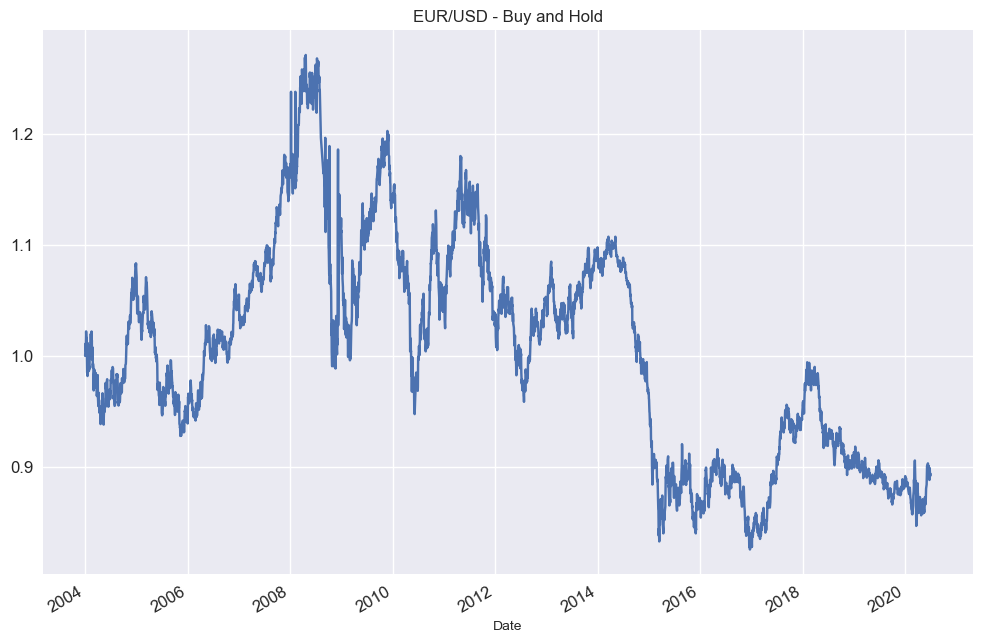

In [235]:
df.creturns.plot(figsize=(12, 8), title="EUR/USD - Buy and Hold", fontsize=12)
plt.show()

In [236]:
df

,price,returns,creturns
Date,,,
2004-01-02,1.258194,0.000000,1.000000
2004-01-05,1.268698,0.008313,1.008348
2004-01-06,1.272103,0.002681,1.011055
2004-01-07,1.264095,-0.006315,1.004690
2004-01-08,1.277498,0.010547,1.015343
...,...,...,...
2020-06-24,1.131235,0.002892,0.899094
2020-06-25,1.125087,-0.005449,0.894208
2020-06-26,1.122208,-0.002562,0.891920


In [237]:
df.creturns.iloc[-1]

0.8939163935445149

In [238]:
df.returns.sum()

-0.11214302770699758

In [239]:
df.describe()

,price,returns,creturns
count,4274.000000,4274.000000,4274.000000
mean,1.262336,-0.000026,1.003292
std,0.122233,0.007593,0.097150
min,1.039047,-0.143324,0.825824
25%,1.145548,-0.003370,0.910470
50%,1.269205,0.000000,1.008751
75%,1.348909,0.003361,1.072099
max,1.598798,0.159632,1.270709


**연간 수익 평균과 리스크**

In [240]:
df.returns.mean() * 252

-0.006612083056191715

In [241]:
df.returns.std() * np.sqrt(252)

0.12054120479431393

**최대 하락폭**

In [242]:
df

,price,returns,creturns
Date,,,
2004-01-02,1.258194,0.000000,1.000000
2004-01-05,1.268698,0.008313,1.008348
2004-01-06,1.272103,0.002681,1.011055
2004-01-07,1.264095,-0.006315,1.004690
2004-01-08,1.277498,0.010547,1.015343
...,...,...,...
2020-06-24,1.131235,0.002892,0.899094
2020-06-25,1.125087,-0.005449,0.894208
2020-06-26,1.122208,-0.002562,0.891920


In [243]:
df["cummax"] = df.creturns.cummax()
df

,price,returns,creturns,cummax
Date,,,,
2004-01-02,1.258194,0.000000,1.000000,1.000000
2004-01-05,1.268698,0.008313,1.008348,1.008348
2004-01-06,1.272103,0.002681,1.011055,1.011055
2004-01-07,1.264095,-0.006315,1.004690,1.011055
2004-01-08,1.277498,0.010547,1.015343,1.015343
...,...,...,...,...
2020-06-24,1.131235,0.002892,0.899094,1.270709
2020-06-25,1.125087,-0.005449,0.894208,1.270709
2020-06-26,1.122208,-0.002562,0.891920,1.270709


In [244]:
df["creturns"].max()

1.2707085208047866

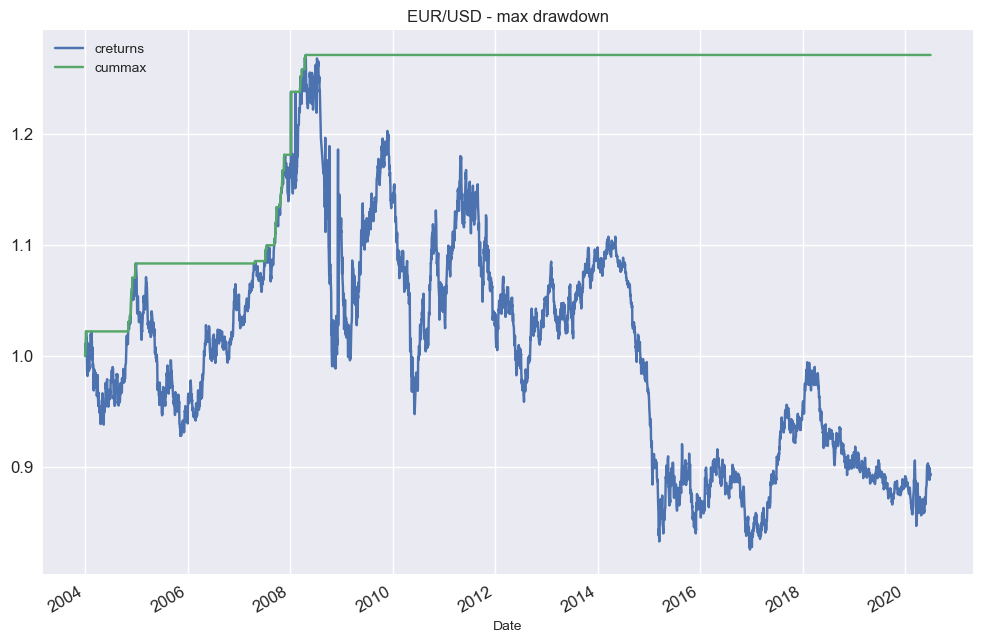

In [245]:
df[["creturns", "cummax"]].dropna().plot(figsize=(12, 8), title="EUR/USD - max drawdown", fontsize=12)
plt.show()

In [246]:
drawdown = df["cummax"] - df["creturns"]
drawdown

Date
2004-01-02    0.000000
2004-01-05    0.000000
2004-01-06    0.000000
2004-01-07    0.006365
2004-01-08    0.000000
                ...   
2020-06-24    0.371615
2020-06-25    0.376500
2020-06-26    0.378788
2020-06-29    0.378488
2020-06-30    0.376792
Length: 4274, dtype: float64

In [247]:
drawdown.max()

0.4448840569933439

In [248]:
drawdown.idxmax()

Timestamp('2016-12-21 00:00:00')

## SMA 교차 전략 정의

In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [250]:
data = pd.read_csv("eurusd.csv", parse_dates=["Date"], index_col="Date")
data

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
...,...
2020-06-24,1.131235
2020-06-25,1.125087
2020-06-26,1.122208


In [251]:
sma_s = 46
sma_l = 137

In [252]:
data.price.rolling(50).mean()

Date
2004-01-01         NaN
2004-01-02         NaN
2004-01-05         NaN
2004-01-06         NaN
2004-01-07         NaN
                ...   
2020-06-24    1.101794
2020-06-25    1.102486
2020-06-26    1.103213
2020-06-29    1.103931
2020-06-30    1.104695
Name: price, Length: 4275, dtype: float64

In [253]:
data["SMA_S"] = data.price.rolling(sma_s).mean()
data["SMA_L"] = data.price.rolling(sma_l).mean()

In [254]:
data

,price,SMA_S,SMA_L
Date,,,
2004-01-01,1.258194,NaN,NaN
2004-01-02,1.258194,NaN,NaN
2004-01-05,1.268698,NaN,NaN
2004-01-06,1.272103,NaN,NaN
2004-01-07,1.264095,NaN,NaN
...,...,...,...
2020-06-24,1.131235,1.103047,1.102654
2020-06-25,1.125087,1.103905,1.102737
2020-06-26,1.122208,1.104801,1.102788


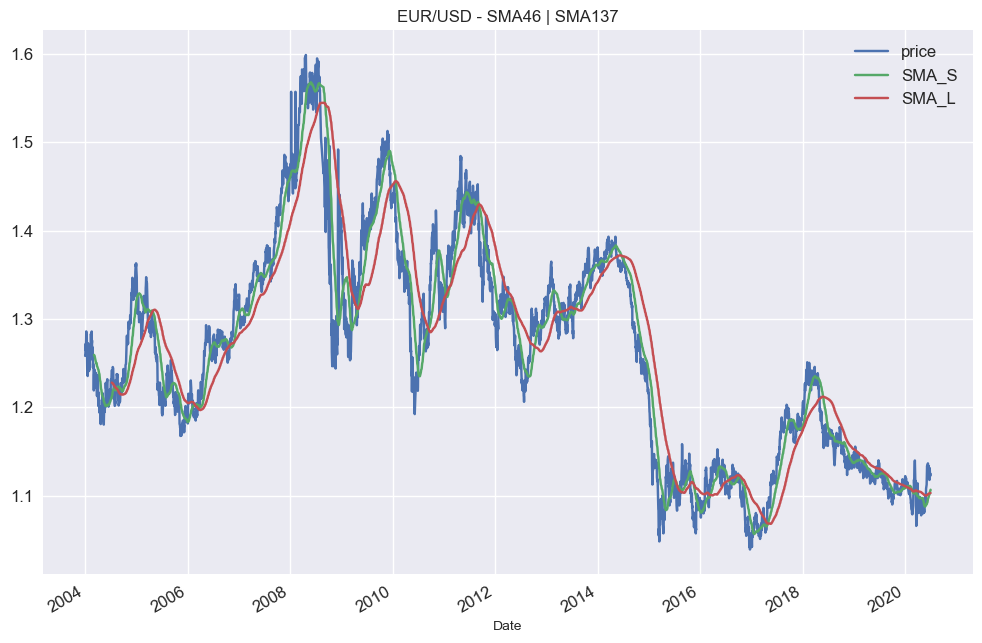

In [255]:
data.plot(figsize=(12, 8), title="EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l), fontsize=12)
plt.legend(fontsize=12)
plt.show()

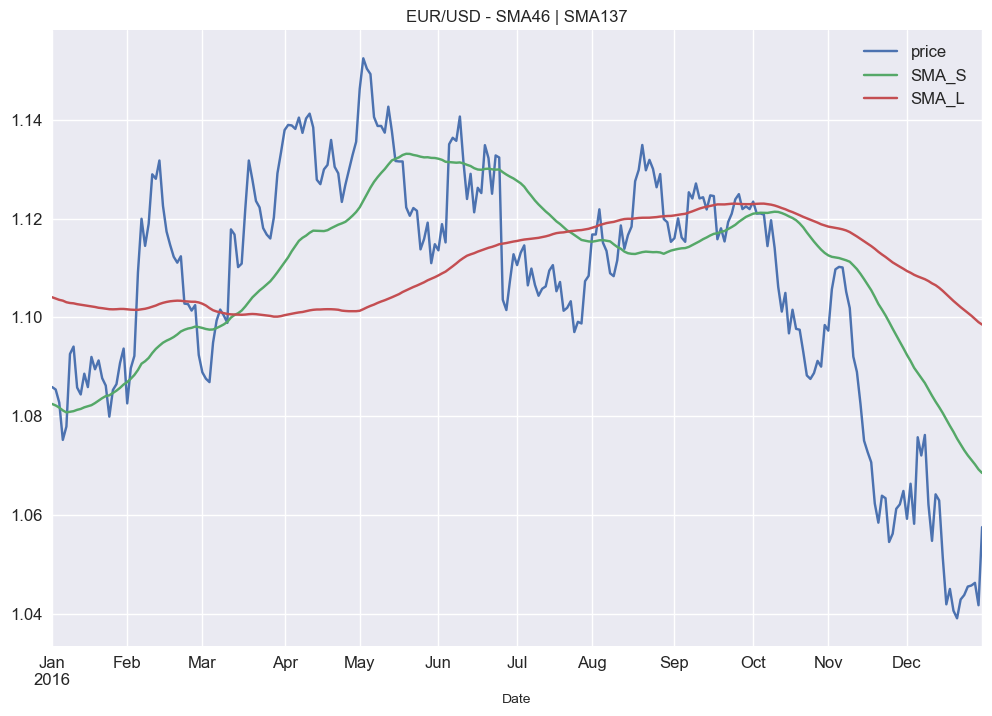

In [256]:
data.loc["2016"].plot(figsize=(12, 8), title="EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l), fontsize=12)
plt.legend(fontsize=12)
plt.show()

In [257]:
data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)
data

,price,SMA_S,SMA_L,position
Date,,,,
2004-01-01,1.258194,NaN,NaN,-1
2004-01-02,1.258194,NaN,NaN,-1
2004-01-05,1.268698,NaN,NaN,-1
2004-01-06,1.272103,NaN,NaN,-1
2004-01-07,1.264095,NaN,NaN,-1
...,...,...,...,...
2020-06-24,1.131235,1.103047,1.102654,1
2020-06-25,1.125087,1.103905,1.102737,1
2020-06-26,1.122208,1.104801,1.102788,1


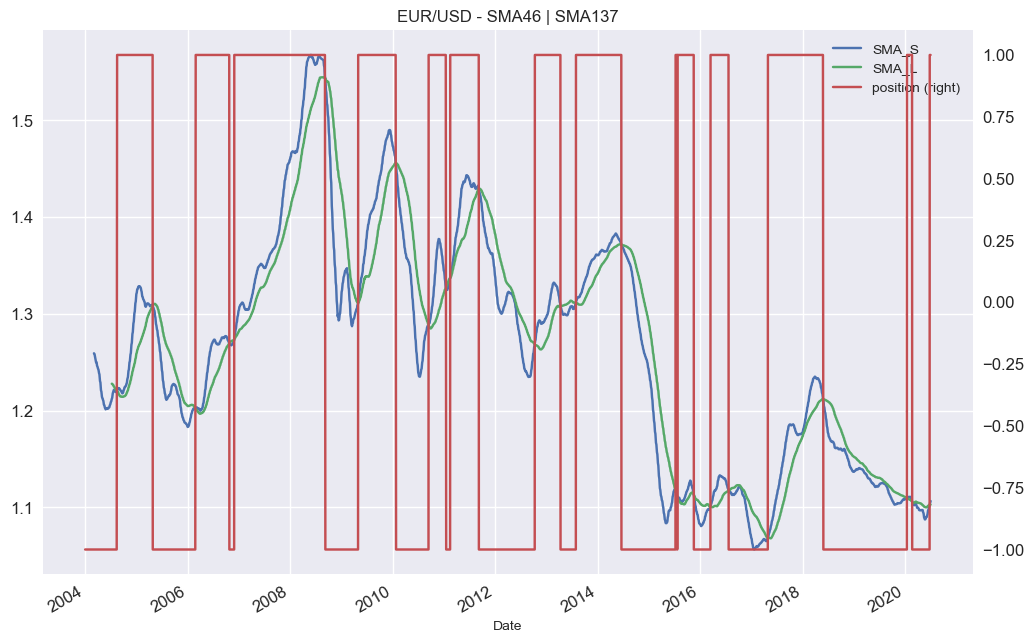

In [258]:
data.loc[:, ["SMA_S", "SMA_L", "position"]].plot(figsize=(12, 8), fontsize=12, secondary_y = "position",
                                                 title="EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l))
plt.show()

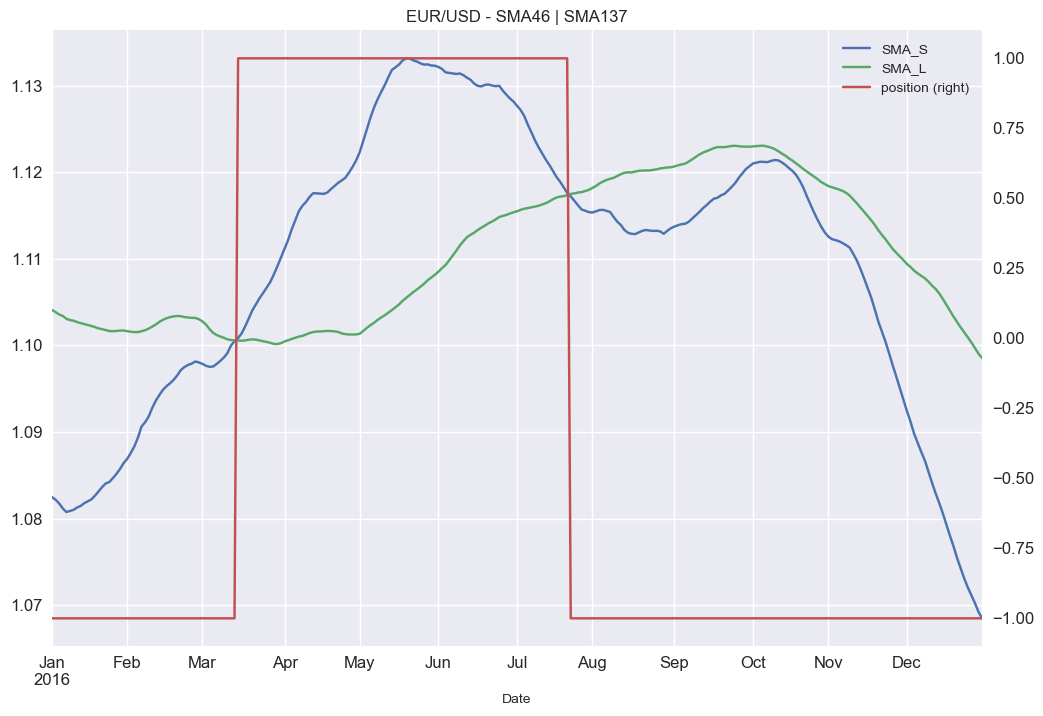

In [259]:
data.loc["2016", ["SMA_S", "SMA_L", "position"]].plot(figsize=(12, 8), fontsize=12, secondary_y = "position",
                                                 title="EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l))
plt.show()

In [260]:
data

,price,SMA_S,SMA_L,position
Date,,,,
2004-01-01,1.258194,NaN,NaN,-1
2004-01-02,1.258194,NaN,NaN,-1
2004-01-05,1.268698,NaN,NaN,-1
2004-01-06,1.272103,NaN,NaN,-1
2004-01-07,1.264095,NaN,NaN,-1
...,...,...,...,...
2020-06-24,1.131235,1.103047,1.102654,1
2020-06-25,1.125087,1.103905,1.102737,1
2020-06-26,1.122208,1.104801,1.102788,1


In [261]:
data["returns"] = np.log(data.price.div(data.price.shift(1)))
data

,price,SMA_S,SMA_L,position,returns
Date,,,,,
2004-01-01,1.258194,NaN,NaN,-1,NaN
2004-01-02,1.258194,NaN,NaN,-1,0.000000
2004-01-05,1.268698,NaN,NaN,-1,0.008313
2004-01-06,1.272103,NaN,NaN,-1,0.002681
2004-01-07,1.264095,NaN,NaN,-1,-0.006315
...,...,...,...,...,...
2020-06-24,1.131235,1.103047,1.102654,1,0.002892
2020-06-25,1.125087,1.103905,1.102737,1,-0.005449
2020-06-26,1.122208,1.104801,1.102788,1,-0.002562


In [262]:
data["strategy"] = data.position.shift(1) * data["returns"]
data

,price,SMA_S,SMA_L,position,returns,strategy
Date,,,,,,
2004-01-01,1.258194,NaN,NaN,-1,NaN,NaN
2004-01-02,1.258194,NaN,NaN,-1,0.000000,-0.000000
2004-01-05,1.268698,NaN,NaN,-1,0.008313,-0.008313
2004-01-06,1.272103,NaN,NaN,-1,0.002681,-0.002681
2004-01-07,1.264095,NaN,NaN,-1,-0.006315,0.006315
...,...,...,...,...,...,...
2020-06-24,1.131235,1.103047,1.102654,1,0.002892,-0.002892
2020-06-25,1.125087,1.103905,1.102737,1,-0.005449,-0.005449
2020-06-26,1.122208,1.104801,1.102788,1,-0.002562,-0.002562


In [263]:
data.dropna(inplace=True)

In [264]:
data[["returns", "strategy"]].sum()

returns    -0.097170
strategy    0.924976
dtype: float64

In [265]:
data[["returns", "strategy"]].sum().apply(np.exp)

returns     0.907402
strategy    2.521808
dtype: float64

In [266]:
data[["returns", "strategy"]].mean() * 252

returns    -0.005916
strategy    0.056317
dtype: float64

In [267]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)
data

,price,SMA_S,SMA_L,position,returns,strategy,creturns,cstrategy
Date,,,,,,,,
2004-07-09,1.241897,1.212185,1.227891,-1,0.001935,-0.001935,1.001937,0.998066
2004-07-12,1.240803,1.213333,1.227764,-1,-0.000881,0.000881,1.001055,0.998946
2004-07-13,1.233304,1.214392,1.227583,-1,-0.006062,0.006062,0.995005,1.005020
2004-07-14,1.238497,1.215486,1.227362,-1,0.004202,-0.004202,0.999195,1.000806
2004-07-15,1.235605,1.216466,1.227096,-1,-0.002338,0.002338,0.996862,1.003148
...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,1.103047,1.102654,1,0.002892,-0.002892,0.912657,2.536414
2020-06-25,1.125087,1.103905,1.102737,1,-0.005449,-0.005449,0.907698,2.522631
2020-06-26,1.122208,1.104801,1.102788,1,-0.002562,-0.002562,0.905375,2.516177


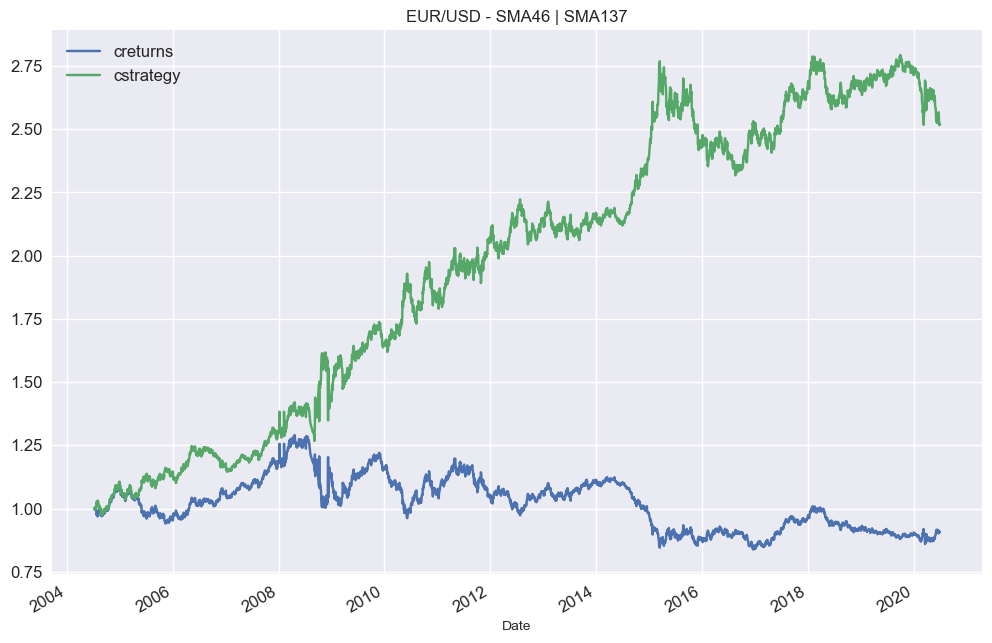

In [268]:
data[["creturns", "cstrategy"]].plot(figsize=(12, 8), title="EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l), fontsize=12)
plt.legend(fontsize=12)
plt.show()

In [269]:
outperf = data.cstrategy.iloc[-1] - data.creturns.iloc[-1]
outperf

1.6144065565705576

## 최적화된 SMA 전략 찾기

In [270]:
df = pd.read_csv("eurusd.csv", parse_dates=["Date"], index_col="Date")
df

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
...,...
2020-06-24,1.131235
2020-06-25,1.125087
2020-06-26,1.122208


In [271]:
def run_strategy(SMA):
    data = df.copy()
    data["returns"] = np.log(data.price.div(data.price.shift(1)))
    data["SMA_S"] = data.price.rolling(int(SMA[0])).mean()
    data["SMA_L"] = data.price.rolling(int(SMA[1])).mean()
    data.dropna(inplace=True)

    data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)
    data["strategy"] = data.position.shift(1) * data["returns"]
    data.dropna(inplace=True)

    return data[["returns", "strategy"]].sum().apply(np.exp)

In [272]:
run_strategy((50, 200))

returns     0.915826
strategy    1.283500
dtype: float64

In [273]:
run_strategy((10, 50))

returns     0.919492
strategy    0.987000
dtype: float64

In [274]:
def run_strategy(SMA):
    data = df.copy()
    data["returns"] = np.log(data.price.div(data.price.shift(1)))
    data["SMA_S"] = data.price.rolling(int(SMA[0])).mean()
    data["SMA_L"] = data.price.rolling(int(SMA[1])).mean()
    data.dropna(inplace=True)

    data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)
    data["strategy"] = data.position.shift(1) * data["returns"]
    data.dropna(inplace=True)

    return -data[["returns", "strategy"]].sum().apply(np.exp)[-1]

In [275]:
from scipy.optimize import brute

In [276]:
# brute(run_strategy, ((10, 50, 1), (100, 252, 1)))

In [277]:
run_strategy((46, 137))

-2.5266939897810787

In [278]:
data[["returns", 'strategy']].sum()

returns    -0.097170
strategy    0.924976
dtype: float64

In [279]:
data[["returns", "strategy"]].sum().apply(np.exp)

returns     0.907402
strategy    2.521808
dtype: float64

In [280]:
data[["returns", "strategy"]].mean() * 252

returns    -0.005916
strategy    0.056317
dtype: float64

In [281]:
data[["returns", "strategy"]].std() * np.sqrt(252)

returns     0.120405
strategy    0.120353
dtype: float64

In [282]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brute
plt.style.use("seaborn-v0_8")

In [283]:
df = pd.read_csv("forex_pairs.csv", parse_dates=["Date"], index_col="Date")
df

,AUDEUR=X,EURUSD=X,USDGBP=X
Date,,,
2004-01-01,0.59780,1.258194,0.56016
2004-01-02,0.60314,1.258194,0.55751
2004-01-05,0.60467,1.268698,0.55334
2004-01-06,0.60350,1.272103,0.54906
2004-01-07,0.60728,1.264095,0.55012
...,...,...,...
2020-06-24,0.61349,1.131235,0.79841
2020-06-25,0.60938,1.125087,0.80561
2020-06-26,0.61373,1.122208,0.80480


In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4295 entries, 2004-01-01 to 2020-06-30
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   AUDEUR=X  4274 non-null   float64
 1   EURUSD=X  4275 non-null   float64
 2   USDGBP=X  4287 non-null   float64
dtypes: float64(3)
memory usage: 134.2 KB


### 거래 비용

In [285]:
data

,price,SMA_S,SMA_L,position,returns,strategy,creturns,cstrategy
Date,,,,,,,,
2004-07-09,1.241897,1.212185,1.227891,-1,0.001935,-0.001935,1.001937,0.998066
2004-07-12,1.240803,1.213333,1.227764,-1,-0.000881,0.000881,1.001055,0.998946
2004-07-13,1.233304,1.214392,1.227583,-1,-0.006062,0.006062,0.995005,1.005020
2004-07-14,1.238497,1.215486,1.227362,-1,0.004202,-0.004202,0.999195,1.000806
2004-07-15,1.235605,1.216466,1.227096,-1,-0.002338,0.002338,0.996862,1.003148
...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,1.103047,1.102654,1,0.002892,-0.002892,0.912657,2.536414
2020-06-25,1.125087,1.103905,1.102737,1,-0.005449,-0.005449,0.907698,2.522631
2020-06-26,1.122208,1.104801,1.102788,1,-0.002562,-0.002562,0.905375,2.516177


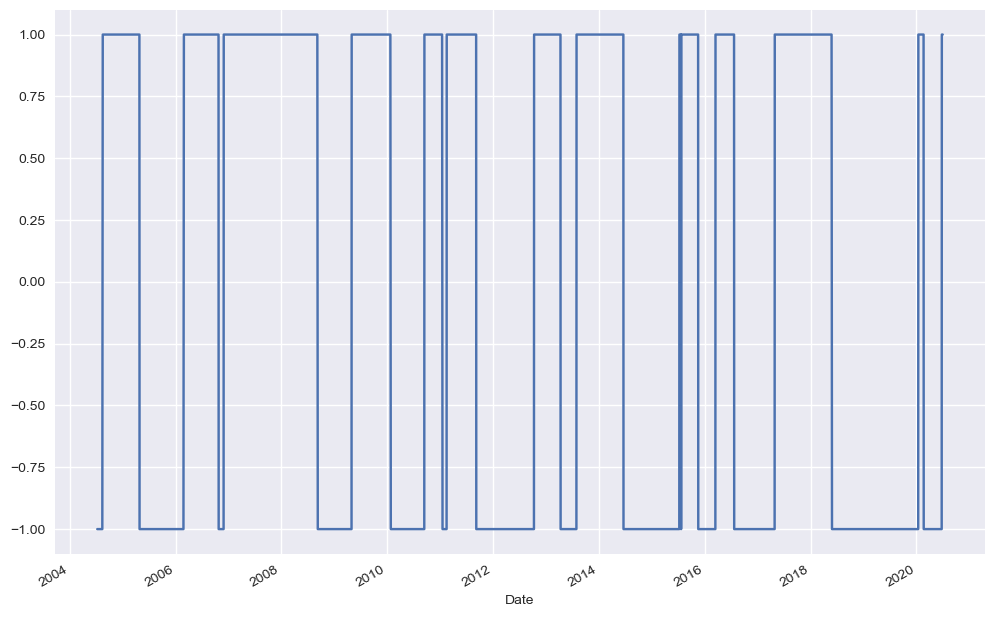

In [286]:
data.loc[:, "position"].plot(figsize=(12, 8))
plt.show()

In [287]:
data.position.diff().fillna(0).abs()

Date
2004-07-09    0.0
2004-07-12    0.0
2004-07-13    0.0
2004-07-14    0.0
2004-07-15    0.0
             ... 
2020-06-24    2.0
2020-06-25    0.0
2020-06-26    0.0
2020-06-29    0.0
2020-06-30    0.0
Name: position, Length: 4139, dtype: float64

In [288]:
data["trades"] = data.position.diff().fillna(0).abs()
data

,price,SMA_S,SMA_L,position,returns,strategy,creturns,cstrategy,trades
Date,,,,,,,,,
2004-07-09,1.241897,1.212185,1.227891,-1,0.001935,-0.001935,1.001937,0.998066,0.0
2004-07-12,1.240803,1.213333,1.227764,-1,-0.000881,0.000881,1.001055,0.998946,0.0
2004-07-13,1.233304,1.214392,1.227583,-1,-0.006062,0.006062,0.995005,1.005020,0.0
2004-07-14,1.238497,1.215486,1.227362,-1,0.004202,-0.004202,0.999195,1.000806,0.0
2004-07-15,1.235605,1.216466,1.227096,-1,-0.002338,0.002338,0.996862,1.003148,0.0
...,...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,1.103047,1.102654,1,0.002892,-0.002892,0.912657,2.536414,2.0
2020-06-25,1.125087,1.103905,1.102737,1,-0.005449,-0.005449,0.907698,2.522631,0.0
2020-06-26,1.122208,1.104801,1.102788,1,-0.002562,-0.002562,0.905375,2.516177,0.0


In [289]:
data.trades.value_counts()

0.0    4112
2.0      27
Name: trades, dtype: int64

### 거래 비용

In [290]:
spread = 1.5 * 0.0001
commissions = 0

In [291]:
half_spread = spread / 2
half_spread

7.500000000000001e-05

In [292]:
ptc = half_spread / data.price.mean()
ptc

5.936034782671269e-05

In [293]:
ptc = 0.00007

In [294]:
data

,price,SMA_S,SMA_L,position,returns,strategy,creturns,cstrategy,trades
Date,,,,,,,,,
2004-07-09,1.241897,1.212185,1.227891,-1,0.001935,-0.001935,1.001937,0.998066,0.0
2004-07-12,1.240803,1.213333,1.227764,-1,-0.000881,0.000881,1.001055,0.998946,0.0
2004-07-13,1.233304,1.214392,1.227583,-1,-0.006062,0.006062,0.995005,1.005020,0.0
2004-07-14,1.238497,1.215486,1.227362,-1,0.004202,-0.004202,0.999195,1.000806,0.0
2004-07-15,1.235605,1.216466,1.227096,-1,-0.002338,0.002338,0.996862,1.003148,0.0
...,...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,1.103047,1.102654,1,0.002892,-0.002892,0.912657,2.536414,2.0
2020-06-25,1.125087,1.103905,1.102737,1,-0.005449,-0.005449,0.907698,2.522631,0.0
2020-06-26,1.122208,1.104801,1.102788,1,-0.002562,-0.002562,0.905375,2.516177,0.0


In [295]:
data["strategy_net"] = data.strategy - data.trades * ptc
data

,price,SMA_S,SMA_L,position,returns,strategy,creturns,cstrategy,trades,strategy_net
Date,,,,,,,,,,
2004-07-09,1.241897,1.212185,1.227891,-1,0.001935,-0.001935,1.001937,0.998066,0.0,-0.001935
2004-07-12,1.240803,1.213333,1.227764,-1,-0.000881,0.000881,1.001055,0.998946,0.0,0.000881
2004-07-13,1.233304,1.214392,1.227583,-1,-0.006062,0.006062,0.995005,1.005020,0.0,0.006062
2004-07-14,1.238497,1.215486,1.227362,-1,0.004202,-0.004202,0.999195,1.000806,0.0,-0.004202
2004-07-15,1.235605,1.216466,1.227096,-1,-0.002338,0.002338,0.996862,1.003148,0.0,0.002338
...,...,...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,1.103047,1.102654,1,0.002892,-0.002892,0.912657,2.536414,2.0,-0.003032
2020-06-25,1.125087,1.103905,1.102737,1,-0.005449,-0.005449,0.907698,2.522631,0.0,-0.005449
2020-06-26,1.122208,1.104801,1.102788,1,-0.002562,-0.002562,0.905375,2.516177,0.0,-0.002562


In [296]:
data["cstrategy_net"] = data.strategy_net.cumsum().apply(np.exp)
data

,price,SMA_S,SMA_L,position,returns,strategy,creturns,cstrategy,trades,strategy_net,cstrategy_net
Date,,,,,,,,,,,
2004-07-09,1.241897,1.212185,1.227891,-1,0.001935,-0.001935,1.001937,0.998066,0.0,-0.001935,0.998066
2004-07-12,1.240803,1.213333,1.227764,-1,-0.000881,0.000881,1.001055,0.998946,0.0,0.000881,0.998946
2004-07-13,1.233304,1.214392,1.227583,-1,-0.006062,0.006062,0.995005,1.005020,0.0,0.006062,1.005020
2004-07-14,1.238497,1.215486,1.227362,-1,0.004202,-0.004202,0.999195,1.000806,0.0,-0.004202,1.000806
2004-07-15,1.235605,1.216466,1.227096,-1,-0.002338,0.002338,0.996862,1.003148,0.0,0.002338,1.003148
...,...,...,...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,1.103047,1.102654,1,0.002892,-0.002892,0.912657,2.536414,2.0,-0.003032,2.526845
2020-06-25,1.125087,1.103905,1.102737,1,-0.005449,-0.005449,0.907698,2.522631,0.0,-0.005449,2.513114
2020-06-26,1.122208,1.104801,1.102788,1,-0.002562,-0.002562,0.905375,2.516177,0.0,-0.002562,2.506683


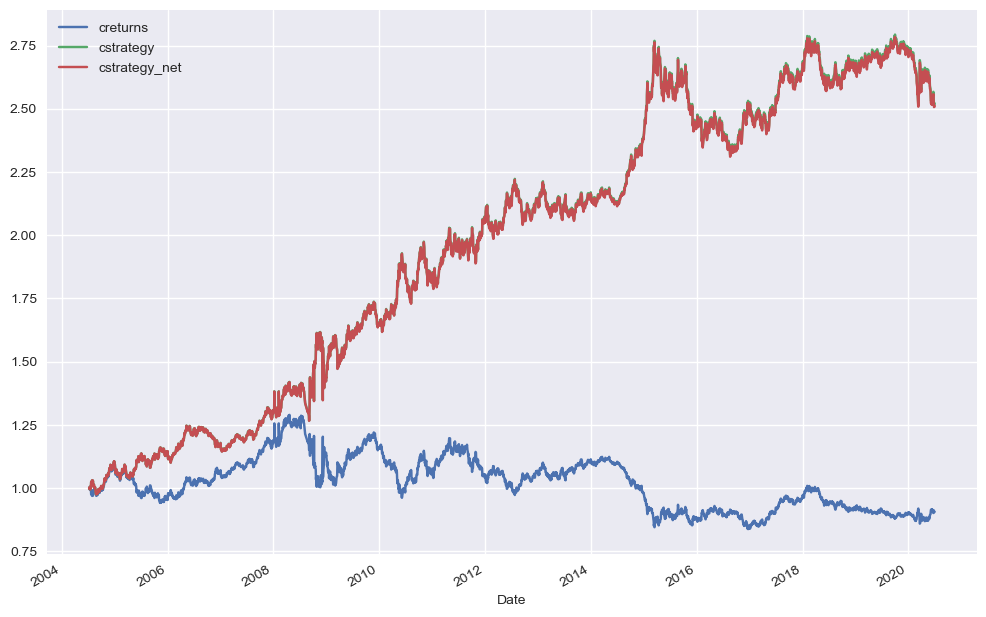

In [297]:
data[["creturns", "cstrategy", "cstrategy_net"]].plot(figsize=(12, 8))
plt.show()

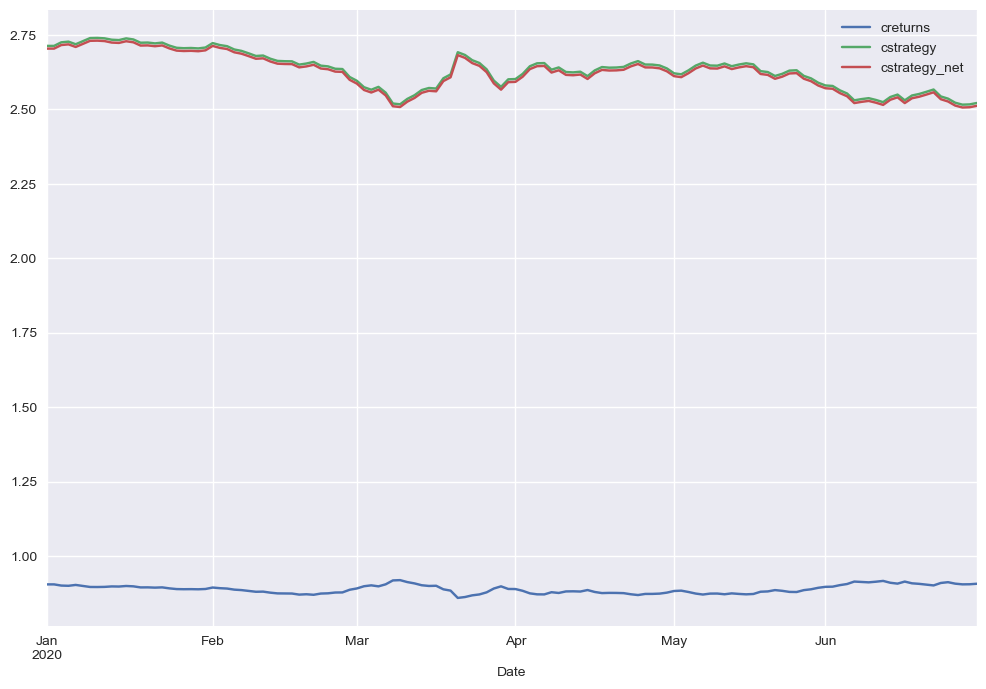

In [298]:
data.loc["2020", ["creturns", "cstrategy", "cstrategy_net"]].plot(figsize=(12, 8))
plt.show()